# Import Packages

In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np


# Load data diamonds.

import seaborn as sns
from sklearn.utils import shuffle
Diamonds = shuffle(sns.load_dataset('diamonds'))

In [24]:
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
31327,0.30,Very Good,E,VVS2,62.4,57.0,759,4.28,4.31,2.68
44575,0.53,Ideal,G,VS1,61.7,55.0,1607,5.18,5.22,3.21
3871,0.90,Very Good,H,SI2,61.2,57.0,3481,6.21,6.27,3.82
26667,1.52,Ideal,G,VVS1,61.4,57.0,16492,7.40,7.38,4.54
22198,1.60,Very Good,I,VS1,62.3,59.0,10238,7.46,7.51,4.66


In [3]:
#  use the following variables to predict the price of diamonds:

# carat
# cut
# color
# clarity

# Recoding 

In [11]:
# Unique values of cut

Diamonds.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [25]:
# Recoding the string variable cut to Numeric into a new Variable cutR. 

def cut_recode(Cuttype):
    if Cuttype == "Ideal":
        return 0
    if Cuttype == "Premium":
        return 1
    if Cuttype == "Very Good":
        return 2
    if Cuttype == "Good":
        return 3
    if Cuttype == "Fair":
        return 4
Diamonds['cutR'] = Diamonds['cut'].apply(cut_recode)

In [16]:
# Unique values of color

Diamonds.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [26]:
# Color Recode 

def color_recode(ColorVal):
    if ColorVal == "G":
        return 0
    if ColorVal == "E":
        return 1
    if ColorVal == "F":
        return 2
    if ColorVal == "H":
        return 3
    if ColorVal == "D":
        return 4
    if ColorVal == "I":
        return 5
    if ColorVal == "J":
        return 6
Diamonds['colorR'] = Diamonds['color'].apply(color_recode)

In [19]:
# Unique values of clarity

Diamonds.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [27]:
#clarity Recode

def clarity_recode(ClarityVal):
    if ClarityVal == "SI1":
        return 0
    if ClarityVal == "VS2":
        return 1
    if ClarityVal == "SI2":
        return 2
    if ClarityVal == "VS1":
        return 3
    if ClarityVal == "VVS2":
        return 4
    if ClarityVal == "VVS1":
        return 5
    if ClarityVal == "IF":
        return 6
    if ClarityVal == "I1":
        return 7
Diamonds['clarityR'] = Diamonds['clarity'].apply(clarity_recode)

In [28]:
# Recoded Diamonds with the numeric values 

Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cutR,colorR,clarityR
31327,0.30,Very Good,E,VVS2,62.4,57.0,759,4.28,4.31,2.68,2,1,4
44575,0.53,Ideal,G,VS1,61.7,55.0,1607,5.18,5.22,3.21,0,0,3
3871,0.90,Very Good,H,SI2,61.2,57.0,3481,6.21,6.27,3.82,2,3,2
26667,1.52,Ideal,G,VVS1,61.4,57.0,16492,7.40,7.38,4.54,0,0,5
22198,1.60,Very Good,I,VS1,62.3,59.0,10238,7.46,7.51,4.66,2,5,3


# Data Wrangling

In [29]:
# Since we can't feed the whole data, we need to subset the diamond data set to keep the useful columns.
# Create x and y variables as their own arrays.
# The x data variable will consist of carat, cutR, colorR and clarityR.
# The y data variable will consist of the target variable, what we are trying to predict. In this case, that is 
# the price of diamonds, or the price column:

x = Diamonds[['carat', 'cutR', 'colorR', 'clarityR']]
y = Diamonds['price']

# Train Test Split

In [30]:
# As arguments into the train_test_split() function, we will place our x and y data, and specify how much of 
# our data you want to test with the argument test_size=. In this case, the value of test_size= is .4, because 
# we are going to use a 60/40 train/test split. This means that we are reserving 40% of our data for testing,
# and training with the remaining 60%.




x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)

In [31]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(32364, 4) (32364,)
(21576, 4) (21576,)


In [ ]:
# Above it is showing that in the x_train dataset, there are 32364 rows and 4 columns, and in the x_test dataset, 
# there are 21576 rows and 4 columns. So we can see how the training and testing data is broken up.

# Create the Linear Regression Model



In [32]:
# Next, we will run the linear regression model on our training data. It's named lm. We will then fit this model to the 
# training data using the .fit() function, specifying the x and y training sets.


lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Since the output is LinearRegression(), it means LM worked ok.

# Interpreting Supervised Machine Learning Model Accuracy

In [ ]:
# It's time to take a peek at the model and determine whether it is any good.

In [33]:
predictions = lm.predict(x_test)
predictions

array([3074.3895644 , 1135.74684987, 8810.96110838, ..., 6074.92007523,
       5327.47504118, 9079.26693123])

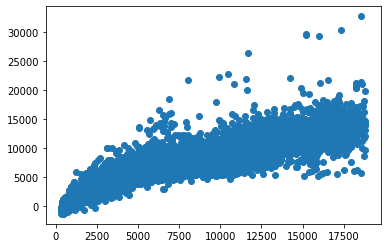

In [34]:
# Plotting it will give us a better idea of how accurate
# our predictions (and thus our model) is. The straighter the line, the better the model fit. 

plt.scatter(y_test, predictions)

In [ ]:
# The above plot looks really good and pretty mucha straight line can be drawn.

# Accuracy Score

In [35]:
# The first way is to print an accuracy score for this model.

print("Score:", lm.score(x_test, y_test))

Score: 0.8639417776819646


In [ ]:
# The score of .864 shows that the model is accurate approximately 86% of the time.Or, we can say that 
# this model predicts the price of diamonds 86.4% times which is really good model.

# Examining Error

In [ ]:
# The next way to determine model fit is to look at the error terms. This is just another way to quantify 
# the residuals - how close is our predicted data from the real data?
# The main thing to know about interpreting error is that the smaller the error value, the better.

# 1. - Mean Absolute Error (MAE)

In [36]:
metrics.mean_absolute_error(y_test, predictions)

950.8667534683542

# 2. - Mean Squared Error (MSE)

In [37]:
metrics.mean_squared_error(y_test, predictions)

2178021.7011096003

# 3. - Root Mean Squared Error (RMSE)

In [39]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1475.8122174279492

# k-Fold Cross Validation in Python

In [40]:
# Import Packages

# We will need from sklearn.model_selection the packages for KFold and for cross_val_score.

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Create the Folds

In [41]:
# By inputting the 5, we have chosen to have 5 iterations as per the HandsOn
# Then the argument True means that we want your data to be shuffled. 


kfold = KFold(n_splits = 5, shuffle=True, random_state=1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [    0     1     2 ... 53937 53938 53939], test: [   10    12    23 ... 53906 53911 53913]
train: [    0     1     4 ... 53936 53938 53939], test: [    2     3     8 ... 53934 53935 53937]
train: [    1     2     3 ... 53937 53938 53939], test: [    0    26    29 ... 53922 53933 53936]
train: [    0     2     3 ... 53937 53938 53939], test: [    1     4     5 ... 53927 53930 53931]
train: [    0     1     2 ... 53935 53936 53937], test: [    9    14    15 ... 53929 53938 53939]


In [42]:
print(cross_val_score(lm, x,y, cv=5))

[0.86718522 0.86206253 0.86509137 0.86437972 0.86091421]


In [ ]:
# Looks like the first trained model was accurate 87% of the time, while the second model was accurate 86% of 
# the time , the third model was accurate 87% of the time, the fourth trained model was accurate 86% of the time 
# and the fifth model was accurate 86% of times.

# Using cross-validation, our model has now been thoroughly tested, we have created a rigorous model.